In [4]:
import pandas as pd

# Load CSV files
call_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Updated_Call_log.csv')
user_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/User_experience.csv')
res_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Resolution_type.csv')
type_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Type.csv')
plan_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Wireless_Plans.csv')

In [5]:
from scipy.stats import zscore

# Calculating mean and standard deviation for Talk_Time and Queue_Time
mean_talk_time = call_df['Talk_Time'].mean()
std_talk_time = call_df['Talk_Time'].std()

mean_queue_time = call_df['Queue_Time'].mean()
std_queue_time = call_df['Queue_Time'].std()

# Grouping data by Agent_ID and calculating the average Talk_Time and Queue_Time for each agent
agent_avg_metrics = call_df.groupby('Agent_ID')[['Talk_Time', 'Queue_Time']].mean().reset_index()

# Calculating z-scores for Talk_Time and Queue_Time
agent_avg_metrics['Zscore_Talk_Time'] = zscore(agent_avg_metrics['Talk_Time'])
agent_avg_metrics['Zscore_Queue_Time'] = zscore(agent_avg_metrics['Queue_Time'])

# Filtering agents whose z-scores are above 2 or below -2 (considered as anomalies)
anomalous_agents_talk = agent_avg_metrics[(agent_avg_metrics['Zscore_Talk_Time'] > 2) | (agent_avg_metrics['Zscore_Talk_Time'] < -2)]
anomalous_agents_queue = agent_avg_metrics[(agent_avg_metrics['Zscore_Queue_Time'] > 2) | (agent_avg_metrics['Zscore_Queue_Time'] < -2)]

anomalous_agents_talk, anomalous_agents_queue


(Empty DataFrame
 Columns: [Agent_ID, Talk_Time, Queue_Time, Zscore_Talk_Time, Zscore_Queue_Time]
 Index: [],
 Empty DataFrame
 Columns: [Agent_ID, Talk_Time, Queue_Time, Zscore_Talk_Time, Zscore_Queue_Time]
 Index: [])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

<function matplotlib.pyplot.axvline(x: 'float' = 0, ymin: 'float' = 0, ymax: 'float' = 1, **kwargs) -> 'Line2D'>

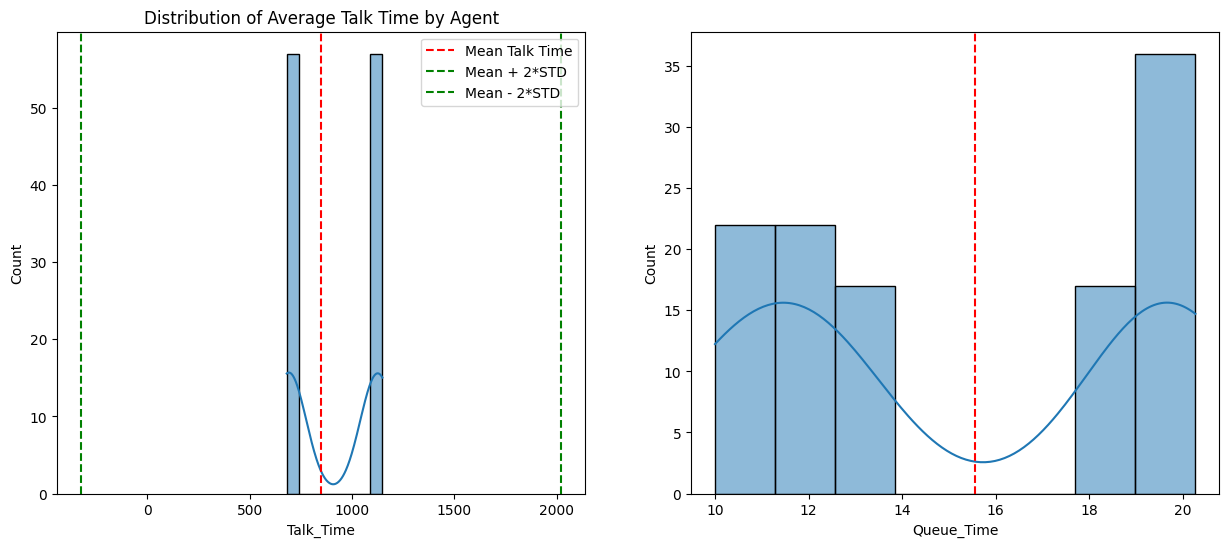

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distributions for Talk_Time and Queue_Time with z-score thresholds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(agent_avg_metrics['Talk_Time'], kde=True)
plt.axvline(mean_talk_time, color='r', linestyle='--', label='Mean Talk Time')
plt.axvline(mean_talk_time + 2*std_talk_time, color='g', linestyle='--', label='Mean + 2*STD')
plt.axvline(mean_talk_time - 2*std_talk_time, color='g', linestyle='--', label='Mean - 2*STD')
plt.title('Distribution of Average Talk Time by Agent')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(agent_avg_metrics['Queue_Time'], kde=True)
plt.axvline(mean_queue_time, color='r', linestyle='--', label='Mean Queue Time')
plt.axvline
